### Лабораторная работа №1
Кудряшов Александр, группа с4110

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict, train_test_split#, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

import random

In [20]:
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['cancer'] = cancer['target']
X, y = df.drop('cancer', axis=1), df['cancer']
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X)

In [21]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension     ...      worst texture  \
count     569.000000              569.000000     ...         569.000000   
mean        0.181162                0.062798     ...          25.677223   
std         0.027414                0.007060     ...           6.146258   
min         0.106000                0.049960     ...          12.020000   
25%         0.161900                0.057700     ...          21.080000   
50%         0.179200                0.061540     ...          25.410000   
75%         0.195700                0.066120     ...          29.720000   
max         0.304000                0.097440     ...          49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      cancer  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

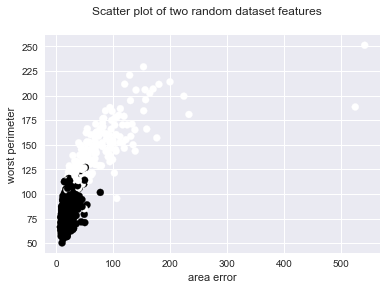

In [22]:
keys = df.keys().tolist()
np.random.shuffle(keys)
plt.figure()
plt.scatter(df[keys[0]], df[keys[1]], c=df['cancer'])
plt.suptitle('Scatter plot of two random dataset features')
plt.xlabel(keys[0])
plt.ylabel(keys[1]);

In [23]:
cov_matrix = X.cov() # матрица ковариации до

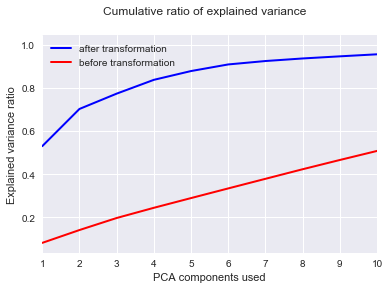

In [25]:
pca = PCA()
pca.fit(X)
plt.figure()
plt.plot(range(1, 31), pca.explained_variance_ratio_.cumsum(), linewidth=2, color='b',
         linestyle = '-', label='after transformation')
plt.plot(range(1, 31), (X.var().sort_values(ascending=False)/sum(X.var())).cumsum(),
         linewidth=2, color='r', label='before transformation')
plt.xlabel('PCA components used')
plt.ylabel('Explained variance ratio')
plt.suptitle('Cumulative ratio of explained variance')
plt.xticks(range(30))
plt.xlim(1, 10)
plt.legend();

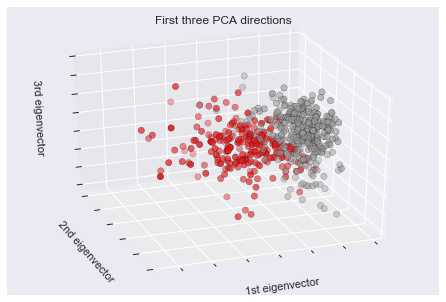

In [26]:
# как видно, использовать больше трех компонент не имеет практического смысла
pca = PCA(n_components=6)
X_transformed = pca.fit_transform(X)
fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y,
            cmap=plt.cm.Set1, edgecolor='k', s=40, label=y)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([]);

In [27]:
transformed_cov_matrix = pca.get_covariance() # матрица ковариации после 

In [29]:
# проверяем ортогональность главных компонент
assert np.isclose(0, np.dot(*X_transformed.T[:2])) and \
    np.isclose(0, np.dot(*X_transformed.T[1:3])), 'Увы, но компоненты не ортогональны'

In [30]:
# собственные значения матрицы ковариации должны совпадать со значениями дисперсии главных компонент
eigvals = np.linalg.eigvals(cov_matrix)
assert all(map(lambda x:np.isclose(x[0], x[1]), zip(eigvals, pca.explained_variance_))), 'Ох, они не совпадают'

AssertionError: Ох, они не совпадают

In [65]:
# проверяем, что след матрицы не изменился после проецирования
assert np.isclose(np.matrix.trace(np.matrix(cov_matrix)),
                  np.matrix.trace(transformed_cov_matrix)), 'Увы, но след матрицы почему-то изменился'

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1)
classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_train, y_train)
print(classification_report(y_test, classifier.predict(X_test), target_names=['no cancer', 'cancer'], digits=5))
# https://en.wikipedia.org/wiki/Precision_and_recall

             precision    recall  f1-score   support

  no cancer    1.00000   0.80952   0.89474        21
     cancer    0.90000   1.00000   0.94737        36

avg / total    0.93684   0.92982   0.92798        57



In [107]:
predicted = cross_val_predict(classifier, X, y, cv=10)
print(classification_report(y, predicted, target_names=['no cancer', 'cancer'], digits=5))

             precision    recall  f1-score   support

  no cancer    0.96133   0.82075   0.88550       212
     cancer    0.90206   0.98039   0.93960       357

avg / total    0.92414   0.92091   0.91944       569



In [108]:
# оценим дисперсию
accuracy = cross_val_score(classifier, X, y, cv=10)
print(accuracy)
accuracy.var()

[ 0.89655172  0.84482759  0.9122807   0.94736842  0.92982456  0.92982456
  0.94736842  0.94642857  0.92857143  0.92857143]


0.00087833177091783639

In [147]:
def get_scores(X, y, clf, cv=10):
    mtrcs = metrics.f1_score, metrics.accuracy_score, metrics.precision_score, metrics.recall_score
    mtrcs_strings = ['f1','accuracy', 'precision', 'recall']
    scores_ = [[cross_val_score(clf, X, y, scoring=metrics.make_scorer(m), cv=cv)] for m in mtrcs]
    scores = [ [ms, np.array(s).mean(), np.array(s).var()] for s,ms in zip(scores_, mtrcs_strings)]
    return scores

In [181]:
results_df = pd.DataFrame(columns=['n', 'k', 'metrics', 'mean', 'variance'])
i = 0
for k in range(2, 100, 5):
    for n in [2, 5, 8, 10]:
        clf = KNeighborsClassifier(n_neighbors=k)
        scrs = get_scores(X, y, clf, cv=n)
        for scr in scrs:
            results_df.loc[i,:]=[n, k, scr[0], scr[1], scr[2]]
            i += 1

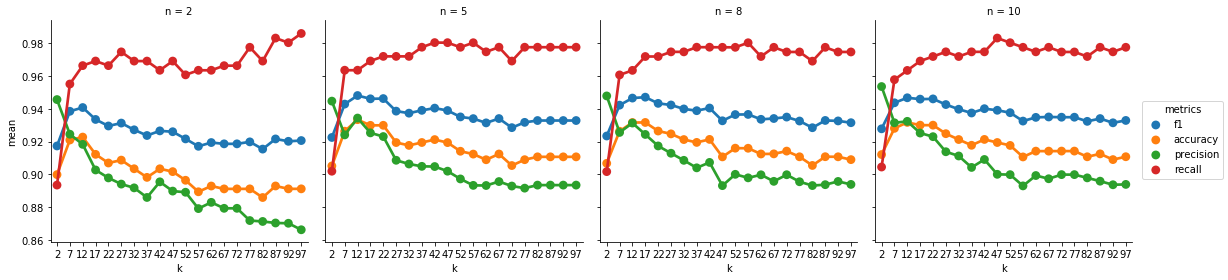

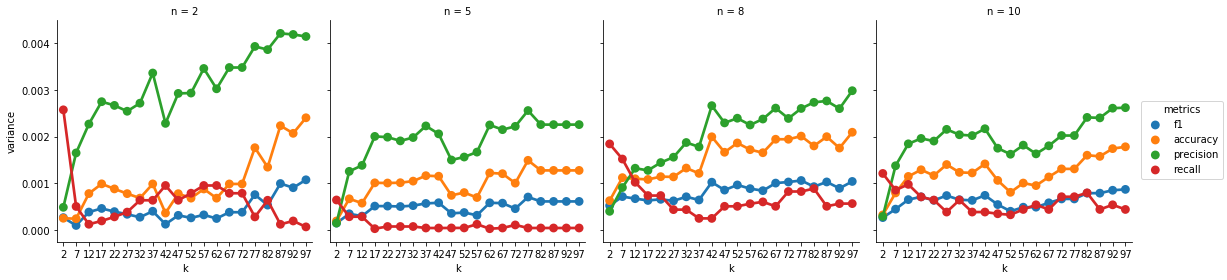

In [182]:
sns.factorplot(x='k', 
             y='mean', 
             data=results_df, 
             hue='metrics',  
             col='n')
sns.factorplot(x='k', 
             y='variance', 
             data=results_df, 
             hue='metrics',  
             col='n');

### Честно говоря, выбрать наиболее приемлемый диапазон значений затруднительно
Если исходить из того, что это данные по заболеванию раком груди, то стоит, наверное, перебдеть, чем недобдеть, и выбрать recall в качестве основной метрики. Поскольку видно, что recall перестает расти примерно после 60, причем при дальнейшем увеличении k дисперсии только увеличиваются, а все остальные метрики постепенно ползут вниз, приемлемый диапазон значений -- где-то от 20 до 60. Его и будем дальше использовать.

In [190]:
results_df_transformed = pd.DataFrame(columns=['n_pca', 'k', 'metrics', 'mean', 'variance'])
i = 0
for k in range(20, 70, 2):
    for n in [1, 2, 3, 4]:
        pca = PCA(n_components=n)
        pca.fit(X)
        X_ = pca.transform(X)
        clf = KNeighborsClassifier(n_neighbors=k)
        scrs = get_scores(X_, y, clf, cv=10)
        for scr in scrs:
            results_df_transformed.loc[i,:]=[n, k, scr[0], scr[1], scr[2]]
            i += 1

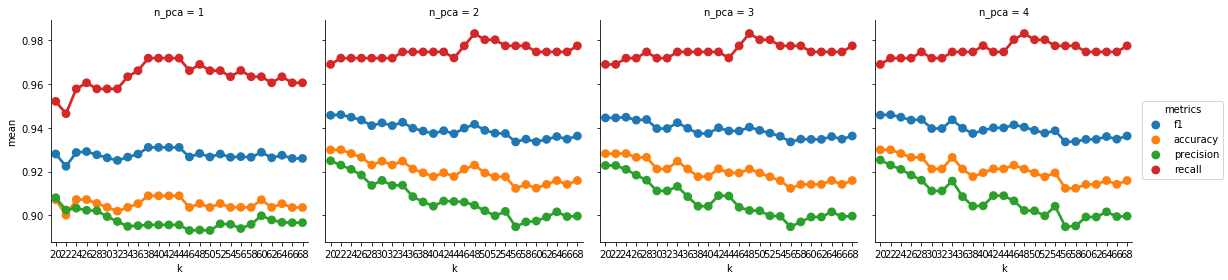

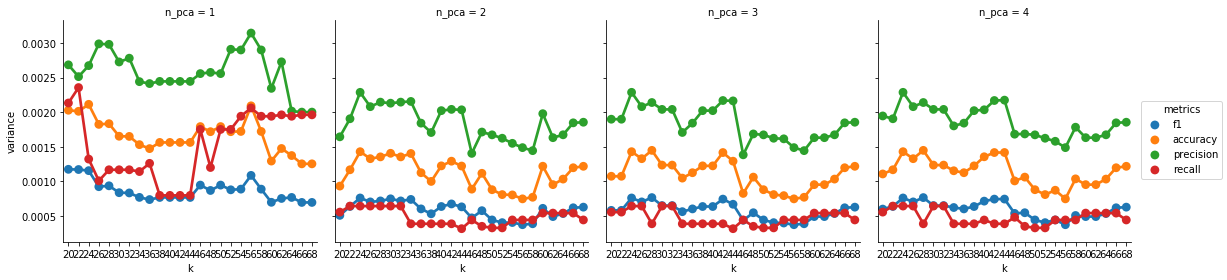

In [187]:
sns.factorplot(x='k', 
             y='mean', 
             data=results_df_transformed, 
             hue='metrics',  
             col='n_pca')
sns.factorplot(x='k', 
             y='variance', 
             data=results_df_transformed, 
             hue='metrics',  
             col='n_pca');

Визуально видно, что принципиальной разницы между n_pca > 1 нет, главное, чтоб компонент было не меньше двух. Сравним с предсказаниями на исходном датасете, выбрав k=20.

In [197]:
%%time
clf1 = KNeighborsClassifier(n_neighbors=20)
r1 = get_scores(X, y, clf1, cv=10)

Wall time: 286 ms


In [198]:
%%time
clf2 = KNeighborsClassifier(n_neighbors=20)
r2 = get_scores(X_transformed, y, clf2, cv=10)

Wall time: 198 ms


In [204]:
print('metrics', 'mean diff', 'variance diff', sep='\t\t')
for t1, t2 in zip(r1, r2):
    print(t1[0], t1[1] - t2[1], t1[2] - t2[2], sep='\t\t')

metrics		mean diff		variance diff
f1		0.00129581636431		1.86408290911e-05
accuracy		0.00175438596491		3.3363808796e-05
precision		0.0024893314367		4.69634207402e-05
recall		0.0		0.0


In [209]:
%%time
pca = PCA(n_components=4)
pca.fit(X)
X_transformed_4 = pca.transform(X)
clf3 = KNeighborsClassifier(n_neighbors=20)
r3 = get_scores(X_transformed_4, y, clf3, cv=10)

Wall time: 230 ms


In [210]:
print('metrics', 'mean diff', 'variance diff', sep='\t\t')
for t1, t2 in zip(r1, r3):
    print(t1[0], t1[1] - t2[1], t1[2] - t2[2], sep='\t\t')

metrics		mean diff		variance diff
f1		0.0		0.0
accuracy		0.0		0.0
precision		0.0		0.0
recall		0.0		0.0


### На четырех компонентах разницы уже совсем никакой. Зато сохраняется небольшой выигрыш по времени даже с учетом затрат на трансформацию. На реальных данных это должно быть полезно. 